<a href="https://colab.research.google.com/github/SamAlrahmani/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
import pandas as pd

In [0]:
df= pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

In [4]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1056,1057,120,RL,43.0,7052,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,Stone,240.0,Gd,TA,PConc,Gd,TA,Av,GLQ,659,Unf,0,705,1364,GasA,...,Y,SBrkr,1364,0,0,1364,1,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,2,484,TA,TA,Y,192,36,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,185850
1348,1349,20,RL,NaN,16196,Pave,NaN,IR3,Low,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1443,Unf,0,39,1482,GasA,...,Y,SBrkr,1494,0,0,1494,1,0,2,0,3,1,Gd,5,Typ,1,Fa,Attchd,1998.0,RFn,2,514,TA,TA,Y,402,25,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,215000
71,72,20,RL,69.0,7599,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,6,1982,2006,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,565,Unf,0,280,845,GasA,...,Y,SBrkr,845,0,0,845,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1987.0,Unf,2,360,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,129500
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,Gd,BrkTil,Gd,TA,No,LwQ,493,Unf,0,1017,1510,GasW,...,Y,SBrkr,1584,1208,0,2792,0,0,2,0,5,1,TA,8,Mod,2,TA,Detchd,1920.0,Unf,2,520,Fa,TA,Y,0,547,0,0,480,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000
694,695,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,6,1936,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,927,927,GasA,...,Y,SBrkr,1067,472,0,1539,0,0,1,1,3,1,TA,5,Typ,0,NaN,Detchd,1995.0,Unf,2,576,TA,TA,Y,112,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,141500


In [5]:
df.shape

(1460, 81)

In [10]:
df[['YearBuilt', 'MSSubClass']].describe()

,YearBuilt,MSSubClass
count,1460.000000,1460.000000
mean,1971.267808,56.897260
std,30.202904,42.300571
min,1872.000000,20.000000
25%,1954.000000,20.000000
50%,1973.000000,50.000000
75%,2000.000000,70.000000
max,2010.000000,190.000000


In [47]:
#column Types
pd.set_option('display.max_rows', 200)
df.dtypes 

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [26]:
df.Fireplaces.sample(4)

256    0
776    0
165    0
911    0
Name: Fireplaces, dtype: int64

In [30]:
df[['Fireplaces', 'BedroomAbvGr']].sample(4)

,Fireplaces,BedroomAbvGr
867,0,3
368,1,2
1084,1,3
1166,0,3


In [33]:
df['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [34]:
df['LotFrontage'].value_counts(dropna=False)

NaN    259
      ... 
Name: LotFrontage, Length: 111, dtype: int64

In [36]:
import numpy as np
np.nan

nan

In [37]:
type(np.nan)

float

In [39]:
df['LotFrontage'].isnull().sum()

259

In [42]:
df.shape

(1460, 81)

In [0]:
#Drop missing data
df['LotFrontage'].dropna(inplace=True)

In [45]:
df['LotFrontage'].isnull().sum()

0

In [50]:
#Making New Features !
#Making smaller data frame !
small=df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
1263,764,1060,764,180500
1236,764,764,862,175500
782,1413,1430,0,187100


In [51]:
small['TotalSF']= small ['TotalBsmtSF']+small['1stFlrSF']+small['2ndFlrSF']
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [59]:
#crosstabs
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [61]:
df[['LotShape', 'Alley', 'Street']].sample(5)

,LotShape,Alley,Street
520,Reg,Grvl,Pave
1297,Reg,NaN,Pave
64,Reg,NaN,Pave
753,Reg,NaN,Pave
808,Reg,NaN,Pave


In [62]:
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [64]:
df['NormalCondition']=np.where(df['SaleCondition']=='Normal', "yes", "no")
df['NormalCondition'].value_counts()

yes    1198
no      262
Name: NormalCondition, dtype: int64

In [65]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [67]:
df['LotShape3']= df['LotShape'].map({'Reg': 'Regular',
                                     'IR1':'Irregular',
                                     'IR2':'Other',
                                     'IR3':'Other'})
df['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [68]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [69]:
#Step 1
df['top_neighbors']='All Others'
df[['top_neighbors', 'Neighborhood']].head()

,top_neighbors,Neighborhood
0,All Others,CollgCr
1,All Others,Veenker
2,All Others,CollgCr
3,All Others,Crawfor
4,All Others,NoRidge


In [76]:
#Step 2
df.loc[df['Neighborhood']=='NAmes', 'top_neighbors']= 'North Ames'
df.loc[df['Neighborhood']=='CollgCr', 'top_neighbors']= 'College Crow'
df.loc[df['Neighborhood']=='OldTown', 'top_neighbors']= 'Old Town'
df.loc[df['Neighborhood']=='Gilbert', 'top_neighbors']= 'My Coworker'
df[['top_neighbors', 'Neighborhood']].sample(20)

,top_neighbors,Neighborhood
1084,My Coworker,Gilbert
279,All Others,ClearCr
902,My Coworker,Gilbert
1242,All Others,NWAmes
673,All Others,Crawfor
779,All Others,Mitchel
818,All Others,ClearCr
508,Old Town,OldTown
1336,All Others,NWAmes
1155,All Others,Veenker


In [77]:
pd.crosstab(df['top_neighbors'], df['LotShape3'])

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,301,25,567
College Crow,53,11,86
My Coworker,53,11,15
North Ames,66,2,157
Old Town,11,2,100


In [78]:
pd.crosstab(df['top_neighbors'], df['LotShape3'], margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,301,25,567,893
College Crow,53,11,86,150
My Coworker,53,11,15,79
North Ames,66,2,157,225
Old Town,11,2,100,113
All,484,51,925,1460


In [82]:
pd.crosstab(df['top_neighbors'], df['LotShape3'], normalize='index', margins=False)
pd.crosstab(df['top_neighbors'], df['LotShape3'], normalize='columns', margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,0.621901,0.490196,0.612973,0.611644
College Crow,0.109504,0.215686,0.092973,0.102740
My Coworker,0.109504,0.215686,0.016216,0.054110
North Ames,0.136364,0.039216,0.169730,0.154110
Old Town,0.022727,0.039216,0.108108,0.077397


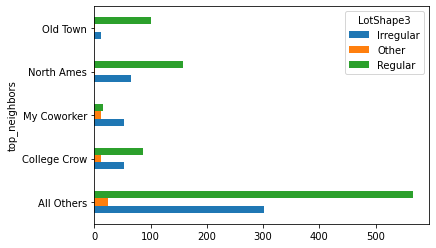

In [87]:
results=pd.crosstab(df['top_neighbors'], df['LotShape3'])
results.plot(kind='barh');

In [88]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NormalCondition,LotShape3,top_neighbors
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,yes,Regular,College Crow
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,yes,Regular,All Others
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,yes,Irregular,College Crow
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,no,Irregular,All Others
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,yes,Irregular,All Others


In [0]:
#############################################################################


# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01